In [4]:
from tensorflow import keras
from keras import datasets
from numpy import array
from numpy.linalg import norm
import random
import IISL_FLpkg.data_generator as dg
import IISL_FLpkg.model_generator as mg

N = 30

sca_metric = keras.metrics.SparseCategoricalAccuracy(name="sca")
all_models, central_server = mg.model_generation(10, sca_metric, 0)
X, Y = dg.generate_synthetic(0, 0, N, 60, 10, 1)

loss_list = []
accuracy_list = []

x = [[] for _ in range(10)]
y = [[] for _ in range(10)]

for iter in range(200):
    random_numbers = random.sample(range(29),10)
    for i in range(10):
        index = random_numbers[i]
        length = len(X[index])/10 - 1
        sel = random.randint(0, int(length))
        x[i] = X[index][sel*10:(sel+1)*10]
        y[i] = Y[index][sel*10:(sel+1)*10]
           
    results = all_models.fed_prox(x, y, sca_metric, central_server)
    loss_list.append(results[0])
    accuracy_list.append(results[1])
    if((iter+1)%10==0):
        print("[0]loss : %.7f, sca : %.7f" %( results[0], results[1]))
    print()

InvalidArgumentError: Shapes of all inputs must match: values[0].shape = [60,20] != values[1].shape = [20] [Op:Pack] name: packed

## Result

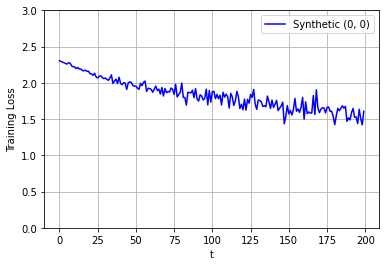

In [9]:
import matplotlib.pyplot as plt

t1 = list(range(len(loss_list)))
y1 = loss_list

# plotting the points
plt.plot(t1, y1, 'blue', label='Synthetic (0, 0)')

plt.ylim([0, 3]) 
plt.legend(ncol = 1)

# naming the x axis
plt.xlabel('t')
# naming the y axis
plt.ylabel('Training Loss')
 
# giving a title to my graph
 
# function to show the plot
plt.grid()
plt.show()

In [ ]:
type()